## Random Forest
Im Folgenden wollen wir anhand des eingebauten Datensatz `digits` sehen, wie ein Klassifikationsmodell zur Erkennung von handgeschiebenen Ziffern eingesetzt werden kann. Dabei werden wir ein Modell der Klasse `RandomForestClassifier` aus Sci-Kit-Learn erstellen und einsetzen.
<img src='https://www.frontiersin.org/files/MyHome%20Article%20Library/284242/284242_Thumb_400.jpg'>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Lade den Datensatz `digits` mit dem Befehl `load_digits` aus Sci-Kit-Learn und speichere ihn in einer Variable `digits`:

In [3]:
digits=load_digits()

Ermittle den Inhalt des Datensatzes mit der Funktion `dir()`

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

Visualisiere mit Hilfe der Funktion `mathshow()` aus dem Untermodul `pyplot` die ersten drei Objekte des Attributs `images`. Dabei kann gern eine for-Schleife eingesetzt werden.

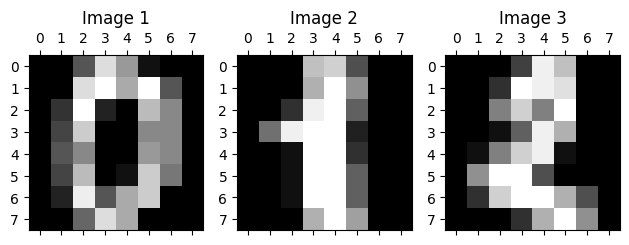

In [5]:
plt.gray() 
for i in range(3):  # Zeigt die ersten 3 Bilder
    plt.subplot(1, 3, i + 1)  # 1 Zeile, 3 Spalten
    plt.matshow(digits.images[i], cmap='gray', fignum=False)
    plt.title(f"Image {i+1}")


plt.tight_layout()
plt.show()

Erstelle aus dem Attribut `data` mit Hilfe von Pandas Klasse `DataFrame`ein Dataframe und zeige die ersten fünf Reihen an:

In [10]:
df=pd.DataFrame(digits.data, columns=digits.feature_names)
df.head(5)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Füge eine neue Spalte `target` in Dataframe mit Werten aus dem Attribut `target` hinzu.

In [12]:
print(digits.target_names)#Alle Klassen
df['target'] = digits.target


[0 1 2 3 4 5 6 7 8 9]


Zeige jetzt die ersten 12 Einträge an.

In [9]:
df.head(12)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


Erstelle ein zweidimensionales Array `X` aus allen Spalten - ausgenommen `target`.    

Erstelle ein eindimensionales Array `y` aus der Spalte `target`

In [13]:
X = df.drop('target', axis=1)#alle Spalte ohne Target
y=df['target']

Spalte die Arrays in Training- und Testingset auf. Dabei 20% der Dateneinträge sollen als Testdaten verwendet werden.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Erstelle ein Random-Forest-Klassifikationsmodell mit einem Parameter von `n_estimators=20` und trainiere es anhand Trainingsdaten.

In [15]:
randomforest = RandomForestClassifier(n_estimators=20, random_state=42) #max_depth=2
randomforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [16]:
randomforest2 = RandomForestClassifier(n_estimators=20,max_depth=2, random_state=42) 
randomforest2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=42)

Lass das Model anhand Testdaten eine Einschätzung machen und speichere das Ergebnis in einer Variable `y_predicted`.

In [17]:
y_pred = randomforest.predict(X_test)
y_pred2 = randomforest2.predict(X_test)

Ermittle die Genauigkeit des trainierten Modells.

In [18]:
accuracy = randomforest.score(X_test, y_test)

accuracy1 = randomforest.score(X_train, y_train)
print(f'Die Geanauigkeit der Testdaten: {accuracy}\nDie Genauigkeit der Trainingsdaten {accuracy1}')


Die Geanauigkeit der Testdaten: 0.9638888888888889
Die Genauigkeit der Trainingsdaten 1.0


In [21]:
accuracy2 = randomforest2.score(X_test, y_test)

accuracy21 = randomforest2.score(X_train, y_train)
print(f'Die Geanauigkeit der Testdaten: {accuracy2}\nDie Genauigkeit der Trainingsdaten {accuracy21}')
# Was bedeutet, dass die Genauigkeit des Modells mit eingesetzter maximale Höhe 2 niedriger ist.

Die Geanauigkeit der Testdaten: 0.7416666666666667
Die Genauigkeit der Trainingsdaten 0.7494780793319415


Zeige die Confusionmatrix anhand reale Daten und Vorhersagen in Testset an. Speichere diese in einer Variable `cm`

In [19]:
y_true = y_test # Wahre Werte
y_pred = randomforest.predict(X_test) # Schätzung
confusion_matrix(y_true, y_pred)

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 45,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  1,  0,  0,  3],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  1,  0,  0,  1,  1,  0,  0,  0, 37]])

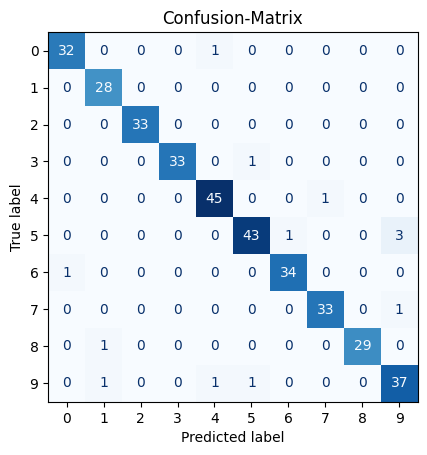

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=digits.target_names)
disp.plot(cmap="Blues", colorbar=False)
plt.title('Confusion-Matrix')
plt.show();

Erstelle mit Seaborn ein Heatmap aus der Confusionmatrix.

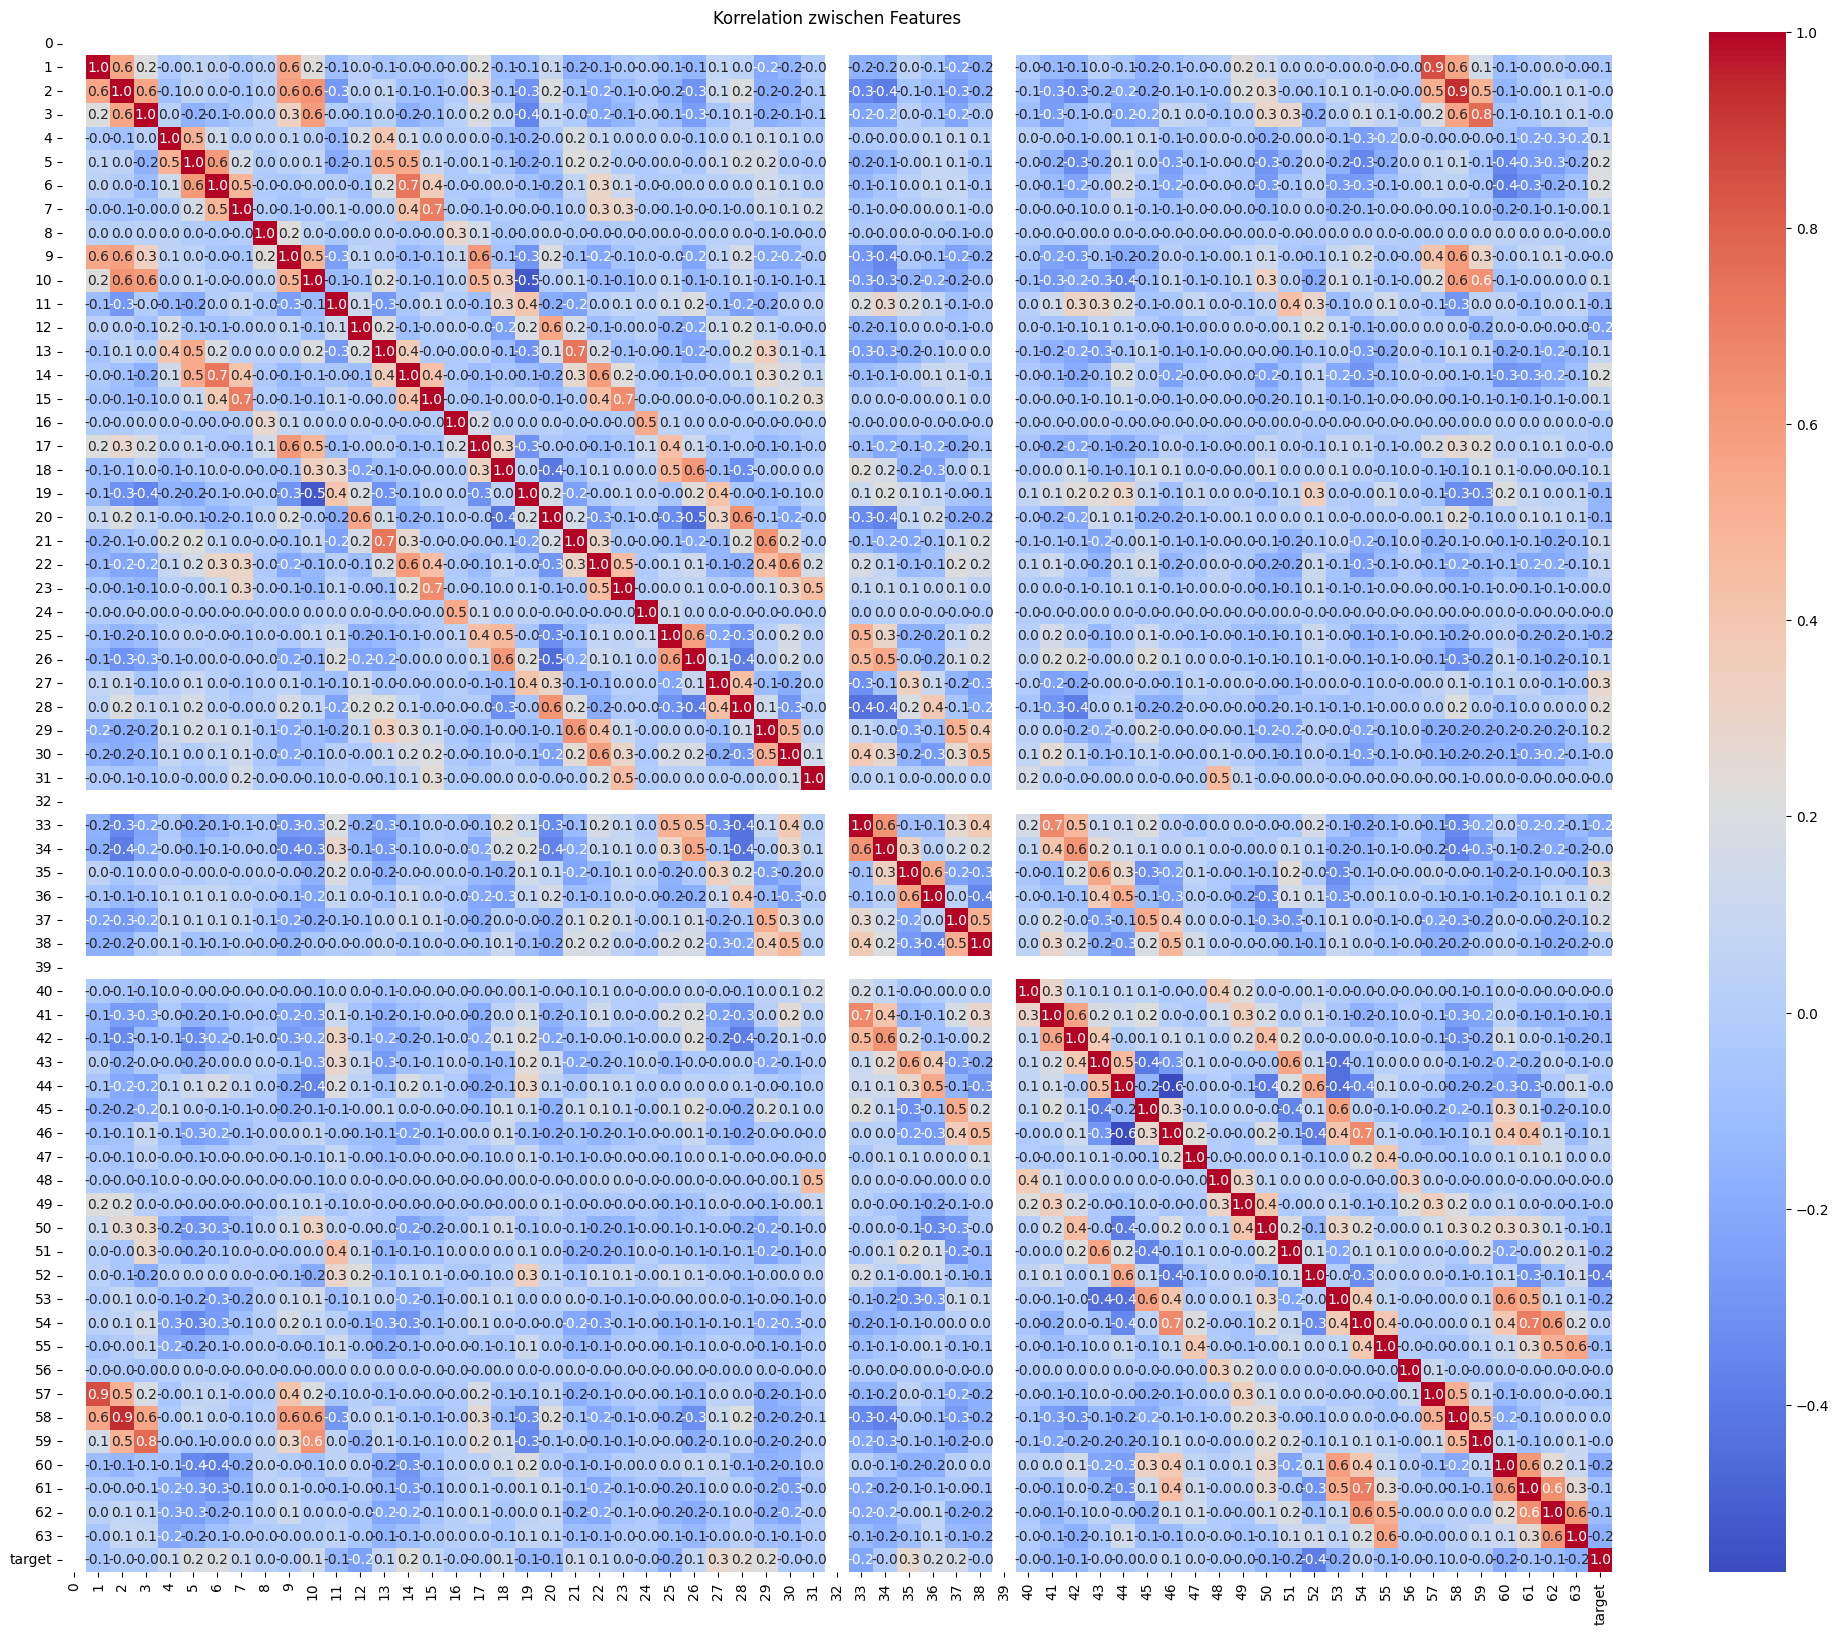

In [19]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(25, 20))  # Größe der Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Korrelation zwischen Features")
plt.show()

In [20]:
# code

Vielen Dank!